## <center> Imports <center>

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import numpy as np


## <center> Import check_in data from Yelp dataset <center>

In [2]:
file = '/Users/Lisa/Downloads/yelp_dataset/yelp_academic_dataset_checkin.json'

In [3]:
checkins = pd.read_json(file, lines=True)

In [4]:
checkins

,business_id,date
0,--1UhMGODdWsrMastO9DZw,"2016-04-26 19:49:16, 2016-08-30 18:36:57, 2016..."
1,--6MefnULPED_I942VcFNA,"2011-06-04 18:22:23, 2011-07-23 23:51:33, 2012..."
2,--7zmmkVg-IMGaXbuVd0SQ,"2014-12-29 19:25:50, 2015-01-17 01:49:14, 2015..."
3,--8LPVSo5i0Oo61X01sV9A,2016-07-08 16:43:30
4,--9QQLMTbFzLJ_oT-ON3Xw,"2010-06-26 17:39:07, 2010-08-01 20:06:21, 2010..."
...,...,...
175182,zzvlwkcNR1CCqOPXwuvz2A,"2017-05-06 20:05:15, 2017-05-12 22:37:03, 2017..."
175183,zzwaS0xn1MVEPEf0hNLjew,"2010-02-16 02:09:56, 2010-07-05 05:40:48, 2010..."
175184,zzwhN7x37nyjP0ZM8oiHmw,"2016-03-06 13:27:02, 2016-03-09 00:41:53, 2016..."
175185,zzwicjPC9g246MK2M1ZFBA,"2012-09-22 00:26:15, 2012-09-23 20:12:00, 2012..."


#### <center> Since the date column is a long string I'll need to change it to a list in order to leverage date/time for future graphing <center>

In [5]:
checkins['date'] = checkins['date'].apply(lambda x: x.split(","))

In [6]:
checkins

,business_id,date
0,--1UhMGODdWsrMastO9DZw,"[2016-04-26 19:49:16, 2016-08-30 18:36:57, 2..."
1,--6MefnULPED_I942VcFNA,"[2011-06-04 18:22:23, 2011-07-23 23:51:33, 2..."
2,--7zmmkVg-IMGaXbuVd0SQ,"[2014-12-29 19:25:50, 2015-01-17 01:49:14, 2..."
3,--8LPVSo5i0Oo61X01sV9A,[2016-07-08 16:43:30]
4,--9QQLMTbFzLJ_oT-ON3Xw,"[2010-06-26 17:39:07, 2010-08-01 20:06:21, 2..."
...,...,...
175182,zzvlwkcNR1CCqOPXwuvz2A,"[2017-05-06 20:05:15, 2017-05-12 22:37:03, 2..."
175183,zzwaS0xn1MVEPEf0hNLjew,"[2010-02-16 02:09:56, 2010-07-05 05:40:48, 2..."
175184,zzwhN7x37nyjP0ZM8oiHmw,"[2016-03-06 13:27:02, 2016-03-09 00:41:53, 2..."
175185,zzwicjPC9g246MK2M1ZFBA,"[2012-09-22 00:26:15, 2012-09-23 20:12:00, 2..."


### <center> Leverage dataframe.explode('column_name') to break the list of check-in's down <center>

In [7]:
checkins_broken_down = checkins.explode('date')
checkins_broken_down

,business_id,date
0,--1UhMGODdWsrMastO9DZw,2016-04-26 19:49:16
0,--1UhMGODdWsrMastO9DZw,2016-08-30 18:36:57
0,--1UhMGODdWsrMastO9DZw,2016-10-15 02:45:18
0,--1UhMGODdWsrMastO9DZw,2016-11-18 01:54:50
0,--1UhMGODdWsrMastO9DZw,2017-04-20 18:39:06
...,...,...
175186,zzzaIBwimxVej4tY6qFOUQ,2014-07-04 21:28:29
175186,zzzaIBwimxVej4tY6qFOUQ,2014-07-14 01:02:55
175186,zzzaIBwimxVej4tY6qFOUQ,2014-07-14 21:26:59
175186,zzzaIBwimxVej4tY6qFOUQ,2014-07-17 01:06:02


### <center> From my EDA is seems like each business has a unique business_id which gives a breakdown of the dates people checked in to these businesses. I can use that to compare against the weather for those dates. <br/> Now Identify the locations with enough data points to scrap weather data for <center>

## <center> Import Business data from Yelp dataset <center>

In [8]:
file2 = '/Users/Lisa/Downloads/yelp_dataset/yelp_academic_dataset_business.json'

In [9]:
businesses = pd.read_json(file2, lines=True)
businesses

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209388,9Q0fPWAjUweoFDk0kafuzQ,Nishi Sushi,9750 Weston Road,Vaughan,ON,L4H 2P2,43.838555,-79.559823,4.0,5,0,"{'Ambience': '{'romantic': False, 'intimate': ...","Japanese, Sushi Bars, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
209389,PotiAhtDMYMNsJCzV0oLAw,Walmart,3240 Wilkinson Blvd,Charlotte,NC,28208,35.226307,-80.893539,2.0,13,0,"{'RestaurantsPriceRange2': '1', 'BusinessParki...","Department Stores, Food, Mobile Phones, Fashio...",None
209390,SYa2j1boLF8DcGVOYfHPcA,Five Guys,7014-590 E Camelback Rd,Scottsdale,AZ,85251,33.504062,-111.929431,3.5,97,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","American (New), Food, Burgers, Restaurants, Fa...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
209391,RSSIsgO00OuWQTRoITacpA,Indian Trail Dog Training,,Indian Trail,NC,28079,35.101965,-80.599385,5.0,3,1,None,"Pet Services, Pet Training, Pets","{'Monday': '0:0-0:0', 'Tuesday': '7:0-19:0', '..."


### <center> Clean up businesses dataframe and elimnate unnecessary columns since its not data I need to focus on <center>

In [10]:
businesses = businesses.drop(['hours', 'categories', 'attributes', 'longitude', 'latitude', 'stars', 'is_open', 'address', 'postal_code', 'review_count'], axis=1)

In [11]:
businesses

,business_id,name,city,state
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,Cornelius,NC
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD",Scottsdale,AZ
2,XNoUzKckATkOD1hP6vghZg,Felinus,Montreal,QC
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,North Las Vegas,NV
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,Mesa,AZ
...,...,...,...,...
209388,9Q0fPWAjUweoFDk0kafuzQ,Nishi Sushi,Vaughan,ON
209389,PotiAhtDMYMNsJCzV0oLAw,Walmart,Charlotte,NC
209390,SYa2j1boLF8DcGVOYfHPcA,Five Guys,Scottsdale,AZ
209391,RSSIsgO00OuWQTRoITacpA,Indian Trail Dog Training,Indian Trail,NC


## <center> Idnetify a State with enough data points to work with (since there's a lot of entries) <center>

In [12]:
businesses.groupby('state').count()

,business_id,name,city
state,,,
AB,8682,8682,8682
AK,1,1,1
AL,3,3,3
AR,1,1,1
AZ,60803,60803,60803
BC,2,2,2
CA,23,23,23
CO,2,2,2
CT,2,2,2


### <center>It seems like Arizona has the most amount of Yelp Activity <br/> Determine which city to focus on in AZ. <br/> Groupby and sort the counted data<center>

In [13]:
AZ = businesses.loc[businesses['state'] == 'AZ'].groupby('city').count()

In [14]:
AZ

,business_id,name,state
city,,,
,1,1,1
AZ,1,1,1
Ahwahtukee,1,1,1
Ahwatukee,14,14,14
Ahwatukee Foothills Village,1,1,1
...,...,...,...
phoenix,14,14,14
scottsdale,5,5,5
surprise,2,2,2


## <center>Take the grouped data and sort it<center>

In [15]:
AZ.sort_values('state', ascending=False)

,business_id,name,state
city,,,
Phoenix,20170,20170,20170
Scottsdale,9341,9341,9341
Mesa,6577,6577,6577
Tempe,4797,4797,4797
Chandler,4579,4579,4579
...,...,...,...
Mesa Az,1,1,1
Mesa Arizona,1,1,1
Mes,1,1,1


#### <center> Through EDA, it seems like Phoenix has the greatest activity to measure against weather. Will focus on Yelp check-in's there<center>

In [16]:
NV = businesses.loc[businesses['state'] == 'NV'].groupby('city').count()

In [17]:
NV

,business_id,name,state
city,,,
110 Las Vegas,1,1,1
4321 W Flamingo Rd,1,1,1
Black Rock City,1,1,1
Blue Diamond,11,11,11
Boulder CIty,1,1,1
...,...,...,...
West Las Vegas,1,1,1
Whitney,1,1,1
henderson,3,3,3


In [18]:
NV.sort_values('state', ascending=False)

,business_id,name,state
city,,,
Las Vegas,31623,31623,31623
Henderson,5272,5272,5272
North Las Vegas,1677,1677,1677
Boulder City,283,283,283
N Las Vegas,28,28,28
...,...,...,...
Las Vegas Nevada,1,1,1
4321 W Flamingo Rd,1,1,1
Las Vegass,1,1,1


In [19]:
businesses

,business_id,name,city,state
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,Cornelius,NC
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD",Scottsdale,AZ
2,XNoUzKckATkOD1hP6vghZg,Felinus,Montreal,QC
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,North Las Vegas,NV
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,Mesa,AZ
...,...,...,...,...
209388,9Q0fPWAjUweoFDk0kafuzQ,Nishi Sushi,Vaughan,ON
209389,PotiAhtDMYMNsJCzV0oLAw,Walmart,Charlotte,NC
209390,SYa2j1boLF8DcGVOYfHPcA,Five Guys,Scottsdale,AZ
209391,RSSIsgO00OuWQTRoITacpA,Indian Trail Dog Training,Indian Trail,NC


## <center> Pull Pheonix, AZ from the businesses dataframe <center>

In [20]:
phx_az_biz = businesses.loc[(businesses['city']=='Phoenix') & (businesses['state']=='AZ')]

In [21]:
phx_az_biz

,business_id,name,city,state
28,07cgbTbANYhVDfzTMOkB9w,Frontier Automotive,Phoenix,AZ
33,vjTVxnsQEZ34XjYNS-XUpA,Wetzel's Pretzels,Phoenix,AZ
37,kHCTmEekJJwYsJEy7xYM5w,Banner - University Family Medicine Center,Phoenix,AZ
53,Mmd5WDFq9hHcQ3uClngGjQ,Irene's Tap Room,Phoenix,AZ
56,YFsb1ydMxFLrxtJ3CffVhw,LA Fitness,Phoenix,AZ
...,...,...,...,...
209345,IldalZigWbk1TlguWHC2gQ,Aeon Internet Marketing,Phoenix,AZ
209352,FcRktj50Mz6sGp1zKvHBMA,Dollar General,Phoenix,AZ
209355,PR1u3jlwNZC0Z2viweTpLA,Integrative Vet Med Center,Phoenix,AZ
209361,-2KAjVCxfQ2YsmuXYLNEpw,DENNIS Uniform Phoenix,Phoenix,AZ


##### <center> Pull Las Vegas, NV from the businesses dataframe <center> <br/> This will be a secondary objective...
    

In [22]:
lv_nv_biz = businesses.loc[(businesses['city']=='Las Vegas') & (businesses['state']=='NV')]

In [23]:
lv_nv_biz

,business_id,name,city,state
6,oiAlXZPIFm2nBCt0DHLu_Q,Green World Cleaners,Las Vegas,NV
16,uZuh51lXu7tsrC8RAwkg1A,Manolo Blahnik,Las Vegas,NV
36,fnZrZlqW1Z8iWgTVDfv_MA,Carl's Jr,Las Vegas,NV
42,fhNf_sg-XzZ3e7HEVGuOZg,Meat Chix And Wieners,Las Vegas,NV
51,5XMKDYmMGSKkCkrYoELxzg,Annette Thomas Hair Colorist Specialist,Las Vegas,NV
...,...,...,...,...
209371,4EwAkiirgMvFleD3B9HrYg,Ignite Funding,Las Vegas,NV
209372,wjZ12shpUWAy4Boy0G5z1g,Island Buffet,Las Vegas,NV
209375,2IQfgwNt1_DVrFR_86_VZw,Britt Pierson Photography,Las Vegas,NV
209382,fNil19SUfPAPnLQrYnFrGQ,Cheyenne West Animal Hospital,Las Vegas,NV


### <center> Merge Phoenix, AZ dataframe to checkins_broken_down <center>

In [24]:
phx_checkins = phx_az_biz.merge(checkins_broken_down, how='left', on='business_id')

In [25]:
phx_checkins

,business_id,name,city,state,date
0,07cgbTbANYhVDfzTMOkB9w,Frontier Automotive,Phoenix,AZ,2010-08-17 01:02:24
1,07cgbTbANYhVDfzTMOkB9w,Frontier Automotive,Phoenix,AZ,2011-07-08 23:11:37
2,07cgbTbANYhVDfzTMOkB9w,Frontier Automotive,Phoenix,AZ,2011-08-08 02:39:29
3,07cgbTbANYhVDfzTMOkB9w,Frontier Automotive,Phoenix,AZ,2011-08-09 14:55:27
4,07cgbTbANYhVDfzTMOkB9w,Frontier Automotive,Phoenix,AZ,2011-08-21 02:04:22
...,...,...,...,...,...
2433944,YZeUH6zYS0dq5QHLYZhUnQ,Hooters,Phoenix,AZ,2019-05-03 07:03:39
2433945,YZeUH6zYS0dq5QHLYZhUnQ,Hooters,Phoenix,AZ,2019-07-29 04:55:19
2433946,YZeUH6zYS0dq5QHLYZhUnQ,Hooters,Phoenix,AZ,2019-08-04 20:46:59
2433947,YZeUH6zYS0dq5QHLYZhUnQ,Hooters,Phoenix,AZ,2019-08-07 03:04:05


In [26]:
type(phx_checkins.iloc[0,4])

str

### <center> get date/time to a workable data type (not a string!) <center>

Example: data["Date"]= pd.to_datetime(data["Date"]) 

In [27]:
phx_checkins['date'] = pd.to_datetime(phx_checkins['date'])

In [28]:
phx_checkins

,business_id,name,city,state,date
0,07cgbTbANYhVDfzTMOkB9w,Frontier Automotive,Phoenix,AZ,2010-08-17 01:02:24
1,07cgbTbANYhVDfzTMOkB9w,Frontier Automotive,Phoenix,AZ,2011-07-08 23:11:37
2,07cgbTbANYhVDfzTMOkB9w,Frontier Automotive,Phoenix,AZ,2011-08-08 02:39:29
3,07cgbTbANYhVDfzTMOkB9w,Frontier Automotive,Phoenix,AZ,2011-08-09 14:55:27
4,07cgbTbANYhVDfzTMOkB9w,Frontier Automotive,Phoenix,AZ,2011-08-21 02:04:22
...,...,...,...,...,...
2433944,YZeUH6zYS0dq5QHLYZhUnQ,Hooters,Phoenix,AZ,2019-05-03 07:03:39
2433945,YZeUH6zYS0dq5QHLYZhUnQ,Hooters,Phoenix,AZ,2019-07-29 04:55:19
2433946,YZeUH6zYS0dq5QHLYZhUnQ,Hooters,Phoenix,AZ,2019-08-04 20:46:59
2433947,YZeUH6zYS0dq5QHLYZhUnQ,Hooters,Phoenix,AZ,2019-08-07 03:04:05


In [29]:
type(phx_checkins.iloc[0,4])

pandas._libs.tslibs.timestamps.Timestamp

In [30]:
phx_checkins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2433949 entries, 0 to 2433948
Data columns (total 5 columns):
 #   Column       Dtype         
---  ------       -----         
 0   business_id  object        
 1   name         object        
 2   city         object        
 3   state        object        
 4   date         datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 191.4+ MB


In [31]:
phx_checkins['date2.0'] = phx_checkins['date'].dt.date

In [32]:
phx_checkins

,business_id,name,city,state,date,date2.0
0,07cgbTbANYhVDfzTMOkB9w,Frontier Automotive,Phoenix,AZ,2010-08-17 01:02:24,2010-08-17
1,07cgbTbANYhVDfzTMOkB9w,Frontier Automotive,Phoenix,AZ,2011-07-08 23:11:37,2011-07-08
2,07cgbTbANYhVDfzTMOkB9w,Frontier Automotive,Phoenix,AZ,2011-08-08 02:39:29,2011-08-08
3,07cgbTbANYhVDfzTMOkB9w,Frontier Automotive,Phoenix,AZ,2011-08-09 14:55:27,2011-08-09
4,07cgbTbANYhVDfzTMOkB9w,Frontier Automotive,Phoenix,AZ,2011-08-21 02:04:22,2011-08-21
...,...,...,...,...,...,...
2433944,YZeUH6zYS0dq5QHLYZhUnQ,Hooters,Phoenix,AZ,2019-05-03 07:03:39,2019-05-03
2433945,YZeUH6zYS0dq5QHLYZhUnQ,Hooters,Phoenix,AZ,2019-07-29 04:55:19,2019-07-29
2433946,YZeUH6zYS0dq5QHLYZhUnQ,Hooters,Phoenix,AZ,2019-08-04 20:46:59,2019-08-04
2433947,YZeUH6zYS0dq5QHLYZhUnQ,Hooters,Phoenix,AZ,2019-08-07 03:04:05,2019-08-07


In [33]:
phx_checkins = phx_checkins.drop('date', axis=1)

In [34]:
phx_checkins

,business_id,name,city,state,date2.0
0,07cgbTbANYhVDfzTMOkB9w,Frontier Automotive,Phoenix,AZ,2010-08-17
1,07cgbTbANYhVDfzTMOkB9w,Frontier Automotive,Phoenix,AZ,2011-07-08
2,07cgbTbANYhVDfzTMOkB9w,Frontier Automotive,Phoenix,AZ,2011-08-08
3,07cgbTbANYhVDfzTMOkB9w,Frontier Automotive,Phoenix,AZ,2011-08-09
4,07cgbTbANYhVDfzTMOkB9w,Frontier Automotive,Phoenix,AZ,2011-08-21
...,...,...,...,...,...
2433944,YZeUH6zYS0dq5QHLYZhUnQ,Hooters,Phoenix,AZ,2019-05-03
2433945,YZeUH6zYS0dq5QHLYZhUnQ,Hooters,Phoenix,AZ,2019-07-29
2433946,YZeUH6zYS0dq5QHLYZhUnQ,Hooters,Phoenix,AZ,2019-08-04
2433947,YZeUH6zYS0dq5QHLYZhUnQ,Hooters,Phoenix,AZ,2019-08-07


#### <center> Groupby and count dates <center>

In [35]:
phx_checkins.iloc[0,4]

datetime.date(2010, 8, 17)

<center> Testing my groupby and count idea for grouping dates

In [36]:
test = phx_checkins.groupby('date2.0').count()

In [37]:
# Test works on grouping data by dates. Now figure out how to break it down by year
test

,business_id,name,city,state
date2.0,,,,
2010-01-16,28,28,28,28
2010-01-17,26,26,26,26
2010-01-18,15,15,15,15
2010-01-19,10,10,10,10
2010-01-20,16,16,16,16
...,...,...,...,...
2019-12-09,355,355,355,355
2019-12-10,334,334,334,334
2019-12-11,350,350,350,350


#### <center> Break up phx_checkins by years <center>

In [38]:
phx_checkins

,business_id,name,city,state,date2.0
0,07cgbTbANYhVDfzTMOkB9w,Frontier Automotive,Phoenix,AZ,2010-08-17
1,07cgbTbANYhVDfzTMOkB9w,Frontier Automotive,Phoenix,AZ,2011-07-08
2,07cgbTbANYhVDfzTMOkB9w,Frontier Automotive,Phoenix,AZ,2011-08-08
3,07cgbTbANYhVDfzTMOkB9w,Frontier Automotive,Phoenix,AZ,2011-08-09
4,07cgbTbANYhVDfzTMOkB9w,Frontier Automotive,Phoenix,AZ,2011-08-21
...,...,...,...,...,...
2433944,YZeUH6zYS0dq5QHLYZhUnQ,Hooters,Phoenix,AZ,2019-05-03
2433945,YZeUH6zYS0dq5QHLYZhUnQ,Hooters,Phoenix,AZ,2019-07-29
2433946,YZeUH6zYS0dq5QHLYZhUnQ,Hooters,Phoenix,AZ,2019-08-04
2433947,YZeUH6zYS0dq5QHLYZhUnQ,Hooters,Phoenix,AZ,2019-08-07


In [39]:
# 
print(phx_checkins.iloc[0,4].month)
print(phx_checkins.iloc[0,4].day)
print(phx_checkins.iloc[0,4].year)

8
17
2010


In [40]:
# new columns for month, date, year
phx_checkins['Month'] = phx_checkins['date2.0'].apply(lambda x: x.month)

In [41]:
phx_checkins['Day'] = phx_checkins['date2.0'].apply(lambda x: x.day)

In [42]:
phx_checkins['Year'] = phx_checkins['date2.0'].apply(lambda x: x.year)

In [43]:
phx_checkins

,business_id,name,city,state,date2.0,Month,Day,Year
0,07cgbTbANYhVDfzTMOkB9w,Frontier Automotive,Phoenix,AZ,2010-08-17,8.0,17.0,2010.0
1,07cgbTbANYhVDfzTMOkB9w,Frontier Automotive,Phoenix,AZ,2011-07-08,7.0,8.0,2011.0
2,07cgbTbANYhVDfzTMOkB9w,Frontier Automotive,Phoenix,AZ,2011-08-08,8.0,8.0,2011.0
3,07cgbTbANYhVDfzTMOkB9w,Frontier Automotive,Phoenix,AZ,2011-08-09,8.0,9.0,2011.0
4,07cgbTbANYhVDfzTMOkB9w,Frontier Automotive,Phoenix,AZ,2011-08-21,8.0,21.0,2011.0
...,...,...,...,...,...,...,...,...
2433944,YZeUH6zYS0dq5QHLYZhUnQ,Hooters,Phoenix,AZ,2019-05-03,5.0,3.0,2019.0
2433945,YZeUH6zYS0dq5QHLYZhUnQ,Hooters,Phoenix,AZ,2019-07-29,7.0,29.0,2019.0
2433946,YZeUH6zYS0dq5QHLYZhUnQ,Hooters,Phoenix,AZ,2019-08-04,8.0,4.0,2019.0
2433947,YZeUH6zYS0dq5QHLYZhUnQ,Hooters,Phoenix,AZ,2019-08-07,8.0,7.0,2019.0


### <center> Get a breakdown by year and the total amount of checkins. Next will be to separate them into years <center>

In [44]:
phx_checkins_years = phx_checkins.groupby('Year').count()
phx_checkins_years

,business_id,name,city,state,date2.0,Month,Day
Year,,,,,,,
2010.0,47024,47024,47024,47024,47024,47024,47024
2011.0,213274,213274,213274,213274,213274,213274,213274
2012.0,282346,282346,282346,282346,282346,282346,282346
2013.0,333793,333793,333793,333793,333793,333793,333793
2014.0,345027,345027,345027,345027,345027,345027,345027
2015.0,315325,315325,315325,315325,315325,315325,315325
2016.0,275605,275605,275605,275605,275605,275605,275605
2017.0,239295,239295,239295,239295,239295,239295,239295
2018.0,206156,206156,206156,206156,206156,206156,206156


In [45]:
checkins_2010 = phx_checkins.loc[phx_checkins['Year'] == 2010]

In [46]:
checkins_2011 = phx_checkins.loc[phx_checkins['Year'] == 2011]

In [47]:
checkins_2012 = phx_checkins.loc[phx_checkins['Year'] == 2012]

In [48]:
checkins_2013 = phx_checkins.loc[phx_checkins['Year'] == 2013]

In [49]:
checkins_2014 = phx_checkins.loc[phx_checkins['Year'] == 2014]

In [50]:
checkins_2015 = phx_checkins.loc[phx_checkins['Year'] == 2015]

In [51]:
checkins_2016 = phx_checkins.loc[phx_checkins['Year'] == 2016]

In [52]:
checkins_2017 = phx_checkins.loc[phx_checkins['Year'] == 2017]

In [53]:
checkins_2018 = phx_checkins.loc[phx_checkins['Year'] == 2018]

In [54]:
checkins_2019 = phx_checkins.loc[phx_checkins['Year'] == 2019]
checkins_2019

,business_id,name,city,state,date2.0,Month,Day,Year
43,vjTVxnsQEZ34XjYNS-XUpA,Wetzel's Pretzels,Phoenix,AZ,2019-06-15,6.0,15.0,2019.0
44,vjTVxnsQEZ34XjYNS-XUpA,Wetzel's Pretzels,Phoenix,AZ,2019-10-26,10.0,26.0,2019.0
48,kHCTmEekJJwYsJEy7xYM5w,Banner - University Family Medicine Center,Phoenix,AZ,2019-10-24,10.0,24.0,2019.0
123,Mmd5WDFq9hHcQ3uClngGjQ,Irene's Tap Room,Phoenix,AZ,2019-01-03,1.0,3.0,2019.0
124,Mmd5WDFq9hHcQ3uClngGjQ,Irene's Tap Room,Phoenix,AZ,2019-01-06,1.0,6.0,2019.0
...,...,...,...,...,...,...,...,...
2433944,YZeUH6zYS0dq5QHLYZhUnQ,Hooters,Phoenix,AZ,2019-05-03,5.0,3.0,2019.0
2433945,YZeUH6zYS0dq5QHLYZhUnQ,Hooters,Phoenix,AZ,2019-07-29,7.0,29.0,2019.0
2433946,YZeUH6zYS0dq5QHLYZhUnQ,Hooters,Phoenix,AZ,2019-08-04,8.0,4.0,2019.0
2433947,YZeUH6zYS0dq5QHLYZhUnQ,Hooters,Phoenix,AZ,2019-08-07,8.0,7.0,2019.0


### <center> Now that I have 2019 checkin data, break it down by months for plotting<center>

In [97]:
jan_checkins_2019 = checkins_2019[checkins_2019['Month'] == 1]
jan_checkins_2019 = jan_checkins_2019['Day'].sort_values()
jan_checkins_2019 = jan_checkins_2019.to_frame()
jan_checkins_2019

,Day
2182910,1.0
2356412,1.0
1308750,1.0
1308749,1.0
1308748,1.0
...,...
1944903,31.0
153234,31.0
1944902,31.0
1946597,31.0


In [90]:
feb_checkins_2019 = checkins_2019[checkins_2019['Month'] == 2]

In [60]:
march_checkins_2019 = checkins_2019[checkins_2019['Month'] == 3]

In [61]:
april_checkins_2019 = checkins_2019[checkins_2019['Month'] == 4]

In [62]:
may_checkins_2019 = checkins_2019[checkins_2019['Month'] == 5]

In [63]:
june_checkins_2019 = checkins_2019[checkins_2019['Month'] == 6]

In [64]:
july_checkins_2019 = checkins_2019[checkins_2019['Month'] == 7]

In [65]:
august_checkins_2019 = checkins_2019[checkins_2019['Month'] == 8]

In [66]:
sept_checkins_2019 = checkins_2019[checkins_2019['Month'] == 9]

In [67]:
oct_checkins_2019 = checkins_2019[checkins_2019['Month'] == 10]

In [68]:
nov_checkins_2019 = checkins_2019[checkins_2019['Month'] == 11]

In [69]:
dec_checkins_2019 = checkins_2019[checkins_2019['Month'] == 12]

### <center> Test out graphing by month <center>

In [102]:
x_ticks = jan_checkins_2019['Day'].unique()

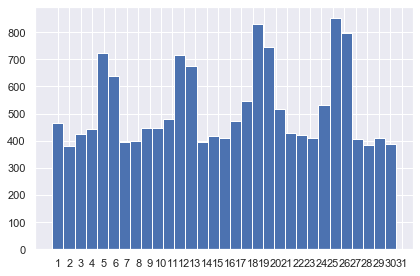

In [108]:
plt.hist(x = jan_checkins_2019['Day'], bins=len(jan_checkins_2019['Day'].unique()), align='left')
plt.xticks(x_ticks)
plt.tight_layout()